# **Convolutional Neural Network**

*Convolutional Neural Network or CNN is a type of artificial neural network, which is widely used for image/object recognition and classification*

>

# ***Library Use In This Project***

In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import warnings
warnings.filterwarnings('ignore')

>

# **Data Set Download**

In [2]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown
100% 308M/309M [00:09<00:00, 38.5MB/s]
100% 309M/309M [00:09<00:00, 32.4MB/s]


>

# **Data Unzip And Save In Folder**

In [3]:
import zipfile
local_zip = '/content/human-emotions-datasethes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/human-emotions-datasethes.zip' mode='r'>>

In [4]:
test = '/content/Emotions Dataset/Emotions Dataset/test'
train = '/content/Emotions Dataset/Emotions Dataset/train'

In [5]:
print(train[:10])
print(test[:10])
CLASS_NAME = ['angry','happy','sad']

/content/E
/content/E


In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAME,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 6799 files belonging to 3 classes.


In [7]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAME,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


>

# **Data Visulaization**

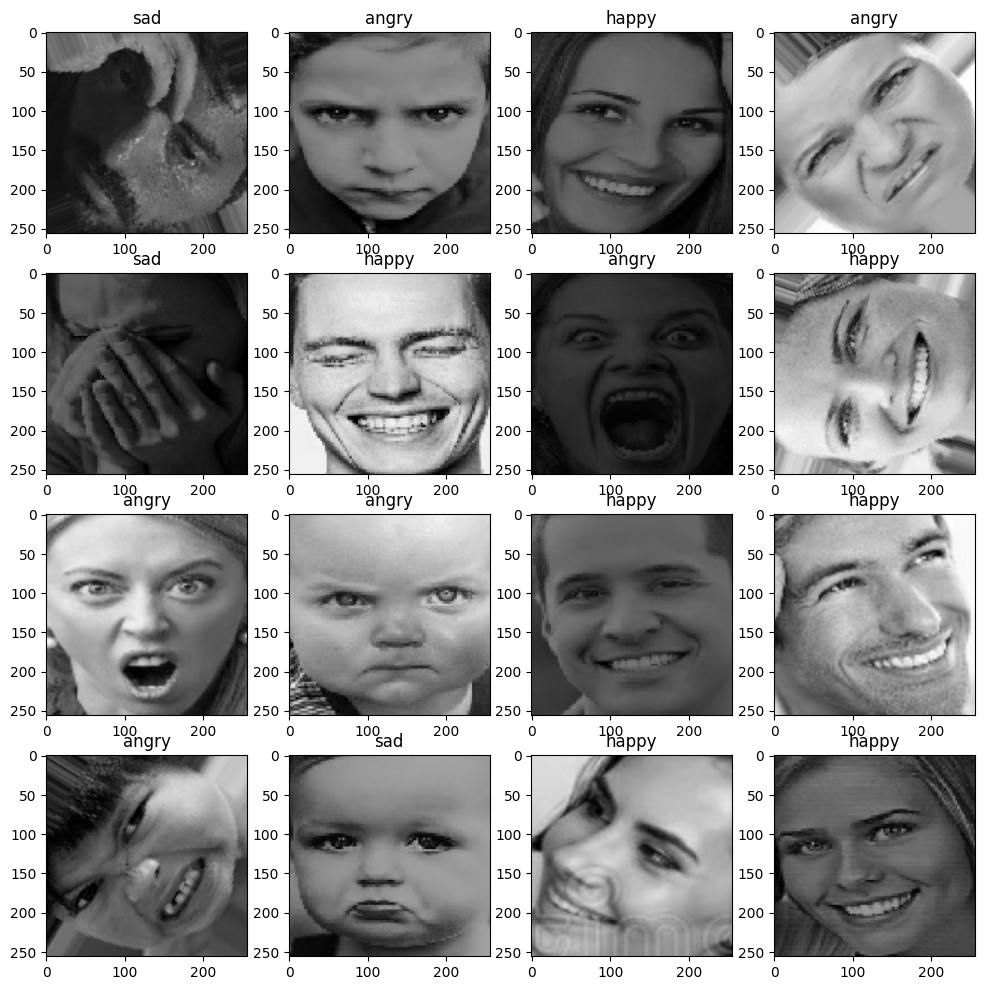

In [8]:
plt.figure(figsize=(12,12))
for image,label in train_dataset.take(1):
  for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i]/255.)
    plt.title(CLASS_NAME[tf.argmax(label[i],axis=0).numpy()])

>

# **Train Model**

In [41]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 30, 30, 64)       

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
213/213 [==============================] - 15s 60ms/step - loss: 1.4859 - accuracy: 0.5165 - val_loss: 0.9567 - val_accuracy: 0.5650
Epoch 2/10
213/213 [==============================] - 13s 60ms/step - loss: 0.8876 - accuracy: 0.5955 - val_loss: 0.8662 - val_accuracy: 0.5953
Epoch 3/10
213/213 [==============================] - 16s 76ms/step - loss: 0.7928 - accuracy: 0.6485 - val_loss: 0.8235 - val_accuracy: 0.6365
Epoch 4/10
213/213 [==============================] - 19s 88ms/step - loss: 0.7213 - accuracy: 0.6847 - val_loss: 0.8034 - val_accuracy: 0.6642
Epoch 5/10
213/213 [==============================] - 17s 76ms/step - loss: 0.6613 - accuracy: 0.7145 - val_loss: 0.7402 - val_accuracy: 0.6782
Epoch 6/10
213/213 [==============================] - 17s 80ms/step - loss: 0.5883 - accuracy: 0.7470 - val_loss: 0.6915 - val_accuracy: 0.7090
Epoch 7/10
213/213 [==============================] - 15s 71ms/step - loss: 0.5380 - accuracy: 0.7767 - val_loss: 0.7332 - val_accuracy:

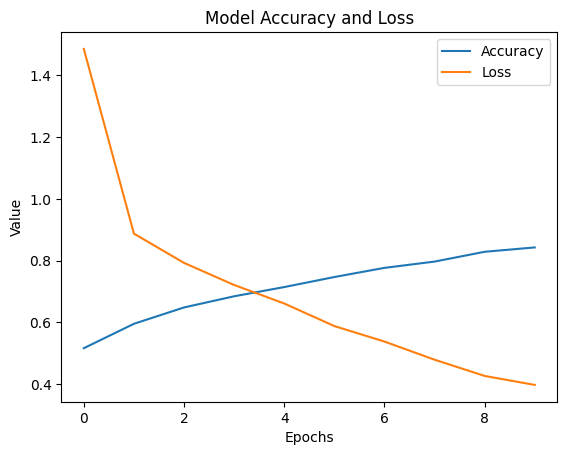

In [49]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [51]:
model.predict(test_dataset)

72/72 [==============================] - 3s 34ms/step


array([[9.3205415e-02, 8.0590111e-01, 1.0089347e-01],
       [1.9441493e-02, 7.1400828e-03, 9.7341835e-01],
       [3.6189795e-04, 9.9934727e-01, 2.9075355e-04],
       ...,
       [1.1573142e-01, 8.7461817e-01, 9.6503934e-03],
       [8.3653291e-04, 9.9471337e-01, 4.4500376e-03],
       [5.0521398e-01, 3.4473863e-01, 1.5004741e-01]], dtype=float32)

In [56]:
model.save('model.h5')

In [57]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.models import load_model

# Load the model (update the path to your model file)
model = load_model('/content/model.h5')

# Upload and process the image
uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(256, 256))  # Adjust target_size as needed
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image if required

    # Predict the class
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)

    print(f"Predictions: {predictions[0]}")
    print(f"Predicted class: {predicted_class[0]}")


Saving sad-face-pictures-qm02f8bfvzhxyf1y.jpg to sad-face-pictures-qm02f8bfvzhxyf1y (3).jpg
1/1 [==============================] - 0s 408ms/step
Predictions: [4.3652960e-08 3.0500233e-10 1.0000000e+00]
Predicted class: 2
